      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]
Independent variables (X):
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]


C:\Users\Admin\AppData\Local\Temp\ipykernel_11796\3618776335.py:71: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


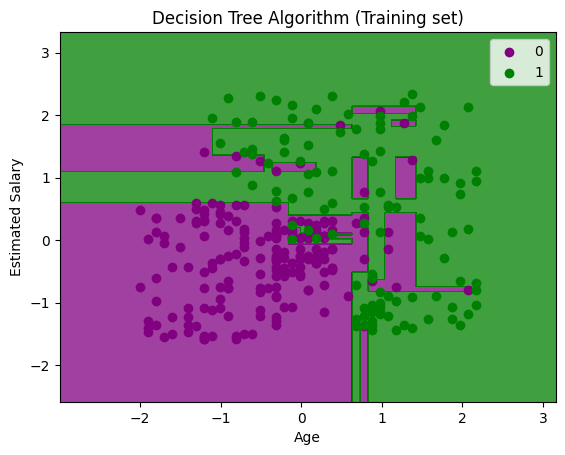

C:\Users\Admin\AppData\Local\Temp\ipykernel_11796\3618776335.py:110: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


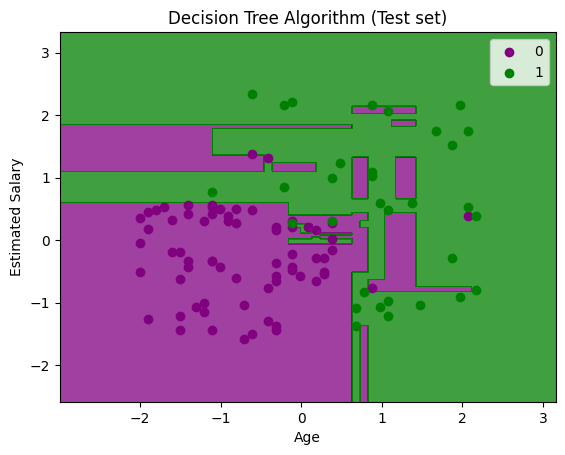

In [11]:
#1.Data Preprocessing Steps:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
df = pd.read_csv('C:/Users/Admin/Documents/sakshiTY/Data Mining/assignment3/User_Data.csv')
print(df)

#Extracting Independent and dependent Variable   
x= df.iloc[:, [2,3]].values   
y= df.iloc[:, 4].values
print("Independent variables (X):")
print(x)
print("Dependent variable (y):")
print(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

#feature Scaling   
from sklearn.preprocessing import StandardScaler     
st_x= StandardScaler()   
x_train= st_x.fit_transform(x_train)     
x_test= st_x.transform(x_test)
print(f"Mean of scaled x_train (per feature): {x_train.mean(axis=0)}")
print(f"Std deviation of scaled x_train (per feature): {x_train.std(axis=0)}")

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Visualizing the Training set results
x_set, y_set = x_train, y_train

# Create a mesh grid
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

# Plot decision boundary
plt.contourf(
    x1, x2,
    classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(('purple', 'green'))
)

# Set plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plot training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],
        c=ListedColormap(('purple', 'green'))(i),
        label=j
    )

plt.title('Decision Tree Algorithm (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Visualizing the Test set results
x_set, y_set = x_test, y_test

# Create a meshgrid
x1, x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)

# Plot the decision boundary
plt.contourf(
    x1, x2,
    classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('purple', 'green'))
)

# Set axis limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plot the test data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('purple', 'green'))(i), label = j
    )

# Add plot labels and title
plt.title('Decision Tree Algorithm (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

